# Uniform Transformations

## Initialization

In [216]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from matplotlib.colors import NoNorm

In [217]:
# convenience function that estimates the difference between 2 images
def diffscore(img1, img2):
    return np.sum(abs(img1-img2))

# convenience function to draw 1 image - no typing 4 lines anymore
def display(img, single_layer = False):
    plt.figure()
    plt.axis("off")
    if single_layer:
        plt.imshow(img,cmap='gray',norm=NoNorm())
        # this ensures plt doesn't treat our grayscale array as a messed-up 3-channel image
    else:
        plt.imshow(img)
    plt.show()

In [218]:
# read original image, converting to RGB because that format is expected by matplotlib
src = cv2.cvtColor(cv2.imread("src.jpg"), cv2.COLOR_BGR2RGB)

## Color Channels

As we have observed, in default encoding each pixel of an image has 3 color channels.

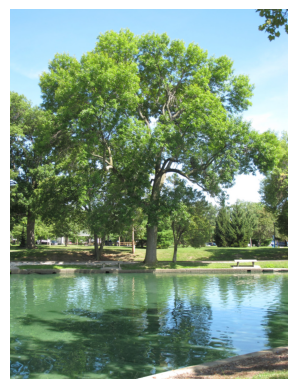

In [219]:
display(src)

We can separately display them to see color intensity:

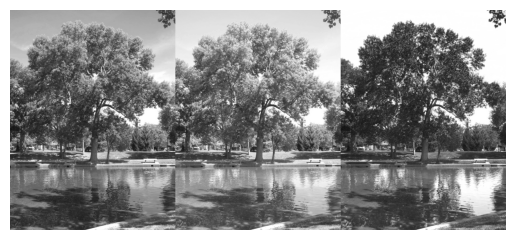

In [220]:
onlyr = src.copy()[:,:,0] # R
onlyg = src.copy()[:,:,1] # G
onlyb = src.copy()[:,:,2] # B
color_concat = np.concatenate((onlyr, onlyg, onlyb), axis=1)
display(color_concat, single_layer=True)

Or isolate them in the original image by filling the other channels with 0

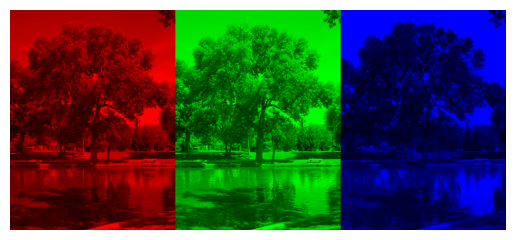

In [221]:
isor = src.copy()
isor[:,:,1:] = 0
isog = src.copy()
isog[:,:,0::2] = 0
isob = src.copy()
isob[:,:,:2] = 0
color_concat = np.concatenate((isor, isog, isob), axis=1)
display(color_concat)

## Mathematical Transforms

As you have noticed from the code so far, image layers (read: numpy arrays) support elementwise assignment. They also support mathematical operations and functions - for example, here's a negative:

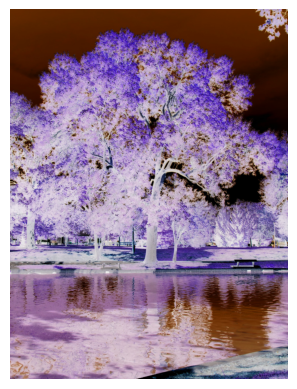

In [222]:
neg = 255 - src.copy() # every single byte is inverted
display(neg)

Let us implement transforms from the lecture - different logarithmic options and a simple piece-wise one.

To work with the math of logarithmic transforms, however, we will need to operate in the 0-1 range:

In [223]:
floatsrc = src.astype(np.float32) /255 # converts pixel values to 0-1 float

#### Logarithm - lowers contrast **(15 points)**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


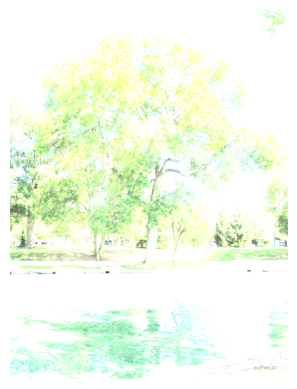

In [224]:
logged = floatsrc.copy()

# formula's in the lecture, log function is np.log2()
c = 3
logged = c*np.log2(1+logged)
display(logged)

#### Power - increases contrast **(15 points)**

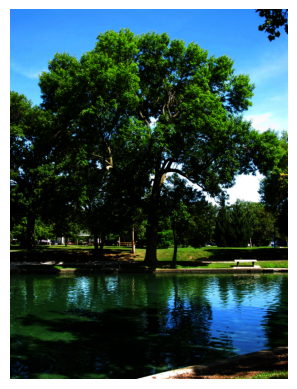

In [225]:
powed = floatsrc.copy()

# formula's in the lecture, and if you don't know the power operator, ask
gamma = 3.5 # gamma value for the transformation
powed = np.power(powed, gamma)

display(powed)

#### Simple piecewise - edit value ranges **(20 points)**

In [226]:
# The function you can use for simpler tasks is np.where(condition, x, y)
# EXAMPLE #
a = np.array([3,4,5,6,7,6,5,4,3])
b = np.where(a<5, 5, a*2)
# all values less than 5 where replaced with 5, and the rest doubled
b

array([ 5,  5, 10, 12, 14, 12, 10,  5,  5])

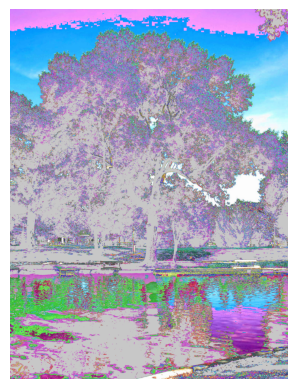

In [227]:
piecewise = src.copy()
piecewise = np.where(piecewise < 100, 199, piecewise*3)


# do something cool that transforms a certain value range

display(piecewise)

#### Most significant bit **(5 points)**

This is, essentially, a piecewise transform around powers of 2 - all bits higher than 127 are 1, and the rest 0, and so on.

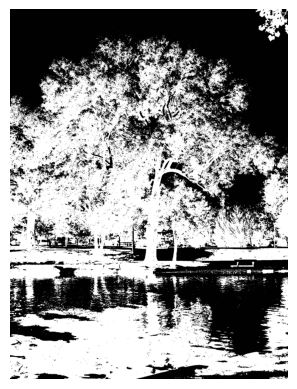

In [228]:
msb = cv2.cvtColor(src.copy(), cv2.COLOR_RGB2GRAY)

# piecewise
msb = np.where(msb>127,1,255)
#msb = msb & 0x80
display(msb, single_layer=True)

# Homework

Your favourite generic social media hired you to **create unique colored photo filters** for them. You need to create **functions that uniformly filter an input image** and return the result. 

You must **utilise both forms of logarithmic transform, as well as the piecewise transform**. Otherwise, everything is up to you. Create **at least 2 filters**, and each of the transform methods will earn you 15 points.

For example, here's an "Alien" filter. It rotates the color channels by one, RGB to GBR.

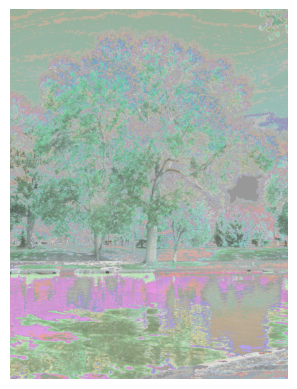

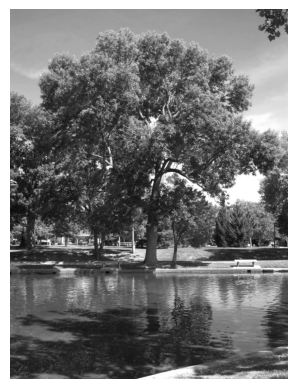

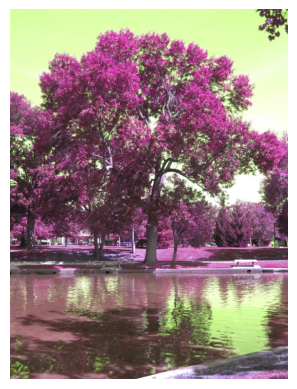

In [229]:
def alien_filter(img):
    out = img.copy()
    outr = out[:,:,0]
    outg = out[:,:,1]
    outb = out[:,:,2]
    out = np.stack((outg, outb, outr), axis=2)
    # np.stack() stacks arrays in higher dimensions
    # because outx are all 2D slices
    return out

def b_and_w(img):
    out = img.copy()
    outr = out[:,:,0]
    outg = out[:,:,1]
    outb = out[:,:,2]

    out = np.stack((outr,outr,outr),axis=2)
    floatsrc = out.astype(np.float32)/255
    
    last = 1*np.power(floatsrc, 1.2)

    return last

def log_transform(img, c=1):
    log_transformed = c * np.log(1 + img + 1e-8) # add a small constant to avoid divide-by-zero errors
    log_transformed = np.uint8(log_transformed/log_transformed.max() * 255)
    return log_transformed


def piecewise_transform(img):
    piecewise = img.copy()
    piecewise = np.where(piecewise < 128, 2 * piecewise, piecewise / 2)

    return piecewise.astype(np.uint8)

def vintage_filter(img):
    log_transformed = log_transform(img)
    piecewise_transformed = piecewise_transform(img)

    combined = cv2.addWeighted(log_transformed, 0.5, piecewise_transformed, 0.5, 0)

    out = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)

    return out



display(vintage_filter(src))
display(b_and_w(src))
display(alien_filter(src))